In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [ ]:
df = pd.read_csv('bike.csv')
df = df.drop(columns=['id'])  # 删除 'id' 列
df = df[df['city'] == 1]  # 只保留上海市数据
df = df.drop(columns=['city'])  # 删除 'city' 列

In [ ]:

df['hour'] = df['hour'].apply(lambda x: 1 if 6 <= x <= 18 else 0)
y = df['y'].values #提取目标变量 y
df = df.drop(columns=['y'])
X = df.values #转换为 Numpy 数组

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)
#划分训练集和测试集


In [ ]:
#将数据进行归一化处理
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train = scaler_X.fit_transform(X_train) 
#先计算均值，标准差，再将每个特征进行标准化处理
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))


In [ ]:
#构建并训练线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
#预测测试集数据
y_pred = model.predict(X_test)


In [20]:
# 反归一化预测结果
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test)


In [22]:
#计算均方根误差
RMSE = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'RMSE: {RMSE}')

RMSE: 36.356020822255104


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


numpy 和 pandas：这两个库用于处理数据和数组操作。
matplotlib.pyplot：用于绘制图形和可视化数据。
sklearn.datasets.load_iris：加载鸢尾花数据集。
train_test_split：用于将数据集分割成训练集和测试集。
PCA：用于降维操作，减少数据的维度，同时尽可能保留数据的特征。
KNeighborsClassifier：用于训练和预测K近邻分类器。
accuracy_score：用于评估分类器的准确性。

In [25]:
#加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征矩阵
y = iris.target  # 标签


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


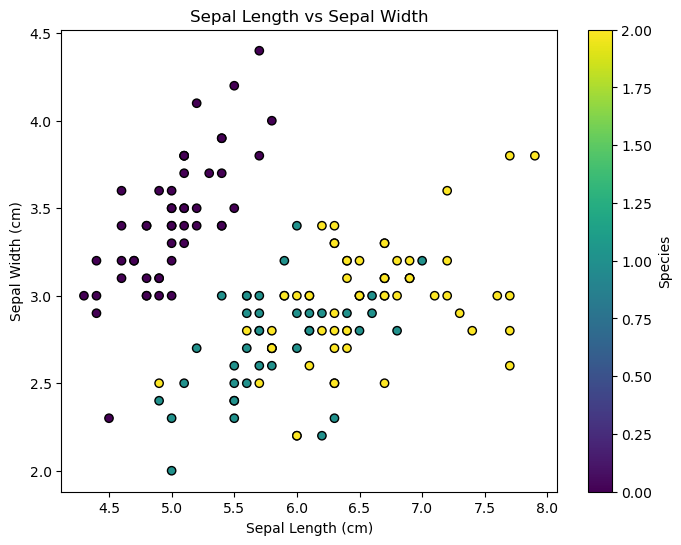

In [27]:
#绘图
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()



In [ ]:
#PCA降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


PCA(n_components=2)：初始化PCA对象，设置降维后的目标维度为2，即将数据从4维（原始特征）降到2维。
pca.fit_transform(X)：对特征矩阵X应用PCA，fit_transform()方法会根据数据计算主成分，并返回降维后的数据。

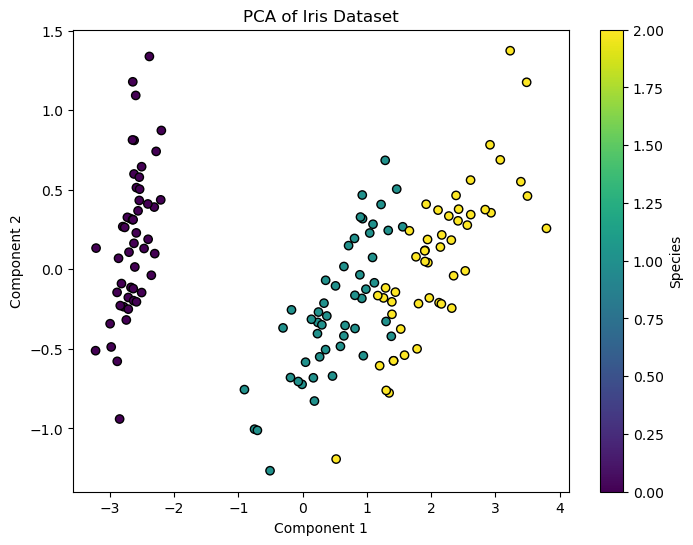

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Species')
plt.show()


In [30]:
#训练K近邻分类器
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [31]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Classification accuracy: {accuracy * 100:.2f}%")


Classification accuracy: 100.00%
